In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from scipy import stats

import math
import os
import random

# Included following due to internet certificate problems
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
## Move to correct folder for server.  Can remove before sending
# os.chdir('/home/poblivsig/Dropbox/horses2')
os.chdir('/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised')

print(os.getcwd())

/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised


In [4]:
## Open the pre-processed csv
df = pd.read_csv('data/winequality-red.csv')
# df = pd.read_csv('data/phishing.csv')

In [5]:
## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)


Shape

(1599, 12)
Columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Description

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0

In [6]:
y = df['quality']
X = df.drop('quality', axis=1)
print(df.shape)

(1599, 12)


In [7]:
N_CLUSTERS = 10
GM_N_CLUSTERS = 10
INIT = 'k-means++'
N_INIT = 10
KM_MAX_ITERS = 300
TOLERANCE = 1e-4
PC_DISTANCES = True
KM_VERBOSE = 0
KM_RANDOM_STATE = 42
ALGORITHM = 'full'

In [8]:
# Scale the features (attributes)
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [9]:
# Visualization of the raw data
sns.set_context('notebook')
plt.style.use('bmh')


In [10]:
N_CLUSTERS = 10
silhouettes = []

## Loop through the cluster numbers and output silhouette
## and elbow charts

for n_cluster in range(2, N_CLUSTERS+1):
    km = KMeans(n_clusters=n_cluster,
                init=INIT,
                n_init=N_INIT,
                max_iter=KM_MAX_ITERS,
                tol=TOLERANCE,
                precompute_distances=PC_DISTANCES,
                verbose=KM_VERBOSE,
                random_state=KM_RANDOM_STATE,
                algorithm=ALGORITHM)

    y_pred = km.fit_predict(X)

    ### Print some stats
    print(f'inertia = {km.inertia_}')
    silhouettes.append(silhouette_score(X, km.labels_, metric='euclidean'))
    # print(f'silhouette score = {s_score:.3f}')

print(f'silhouettes = {silhouettes}')

/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in

inertia = 17747.118884091164
inertia = 13551.186720426002
inertia = 11633.46437186302
inertia = 10566.21353461303
inertia = 9690.67975996149
inertia = 8694.817489148252
inertia = 8050.680736338207
inertia = 7653.230290108939
inertia = 7342.88342551446
silhouettes = [0.7145213962800158, 0.5533331826619446, 0.19707129341556034, 0.20190637434242364, 0.1620150837408553, 0.17330759209904878, 0.1730012838880235, 0.1734840650547436, 0.17542236039923004]


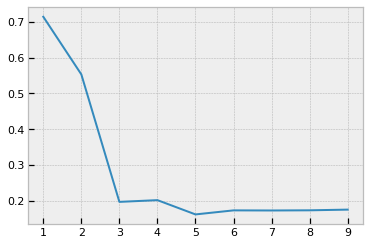

In [11]:
# plt.plot(silhouettes, np.linspace(0, N_CLUSTERS), N_CLUSTERS)
# plt.plot(silhouettes, np.arange(1, 10), N_CLUSTERS)
plt.plot(np.arange(1, 10),silhouettes)
plt.show()
# print(f'silhouettes = \n{silhouettes}')
######## COMPLETE ABOVE LOOP

In [120]:
print(len(silhouettes))
print(len(np.linspace(0, N_CLUSTERS)))

9
50


In [121]:
# print(np.arange(1, 10))
# crash_df =  sns.load_dataset('car_crashes')
# pd.set_option('display.max_columns', 10)
# print(crash_df.head())

In [122]:
# sns.distplot(crash_df['not_distracted'])

In [123]:
# sns.kdeplot(crash_df['alcohol'])

In [124]:
# sns.pairplot(crash_df)

In [125]:
# tips_df = sns.load_dataset('tips')
# sns.pairplot(df, hue='sex', palette='Blues')

In [126]:
# sns.pairplot(crash_df)

In [127]:
pd.set_option('display.max_columns', 10)
# print(tips_df.head())


In [128]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(4, 2))
# sns.set_context('paper', font_scale=1.3) ## Can be 'talk' or 'poster'
# sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

In [129]:
# sns.countplot(x='sex', data=tips_df)


In [130]:
# sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

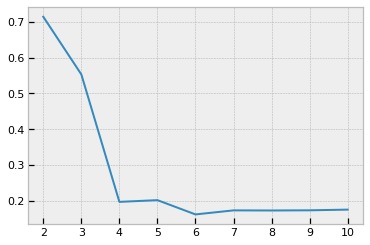

In [131]:
sns.lineplot(x=np.arange(2 ,N_CLUSTERS+1), y=silhouettes)

In [132]:
print(len(np.arange(2, N_CLUSTERS+1)))
print(len(silhouettes))

9
9


/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in

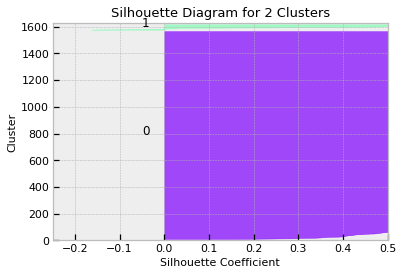

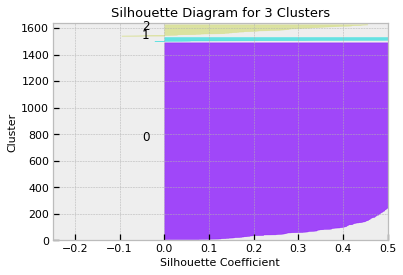

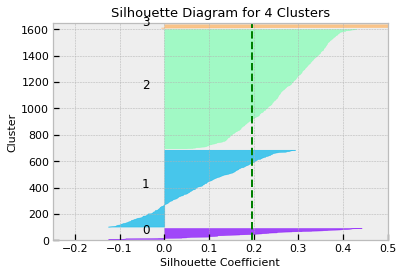

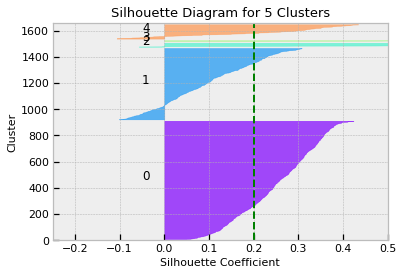

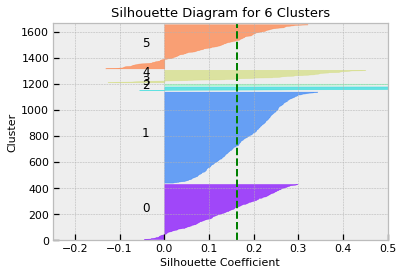

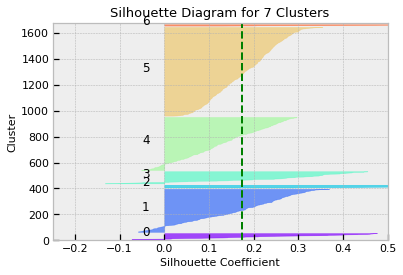

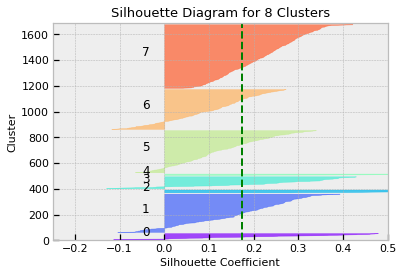

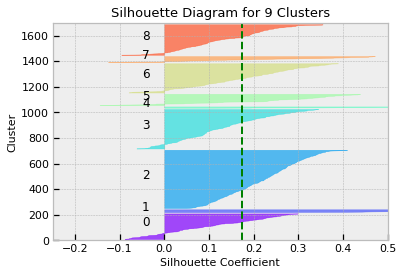

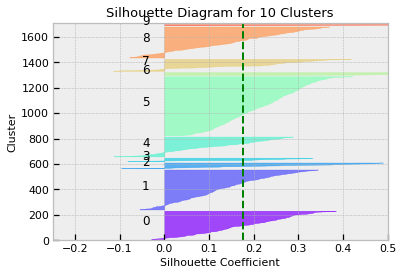

In [133]:
# Plot the silhouette scores against each other.
clusters = np.arange(2, N_CLUSTERS+1)
silhouette_scores = {}

# sample_silhouette_scores = {}


## Borrowed from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
for cluster in clusters:
    ## Build the plot
    fig, ax = plt.subplots()

    ## The plot on x for the silhouette coeffients ranges from -1 to +1
    ax.set_xlim([-0.25, 0.5])
    ## The plot on y has to include all of the shapes with their values sorted
    ax.set_ylim([0, len(X) + (cluster + 1) * 10])

    ## Now do the KMeans itself...
    km = KMeans(n_clusters=cluster,
                init=INIT,
                n_init=N_INIT,
                max_iter=KM_MAX_ITERS,
                tol=TOLERANCE,
                precompute_distances=PC_DISTANCES,
                verbose=KM_VERBOSE,
                random_state=KM_RANDOM_STATE,
                algorithm=ALGORITHM)
    y_pred = km.fit_predict(X)
    # silhouette_scores[cluster] = silhouette_score(X, y_pred)
    silhouette_average = silhouette_score(X, y_pred)
    silhouette_scores[cluster] = silhouette_average
    # What is the silhouette score for each instance?
    sample_silhouette_scores = silhouette_samples(X, y_pred)

    lower_y = 10
    for j in range(cluster):
        # Group together the silhouette coefficients for cluster i
        # and the sort them from largest to smallest
        j_cluster_coeffs = sample_silhouette_scores[y_pred == j]
        # print(f'cluster{cluster} sample coefficients =\n {j_cluster_coeffs}')
        j_cluster_coeffs.sort()

        ## Get bottom of cluster shape for chart
        upper_y = lower_y + j_cluster_coeffs.shape[0]

        colour = cm.rainbow(float(j) / cluster)

        ## Draw the cluster shape
        ax.fill_betweenx(np.arange(lower_y, upper_y),
                         0, j_cluster_coeffs,
                         facecolor=colour, edgecolor=colour, alpha=0.7)
        ax.text(-0.05, lower_y + 0.5 *j_cluster_coeffs.shape[0], str(j))

        # Get the next clusters position
        lower_y = upper_y + 10

    ## Draw the average silhouette score line.
    ax.axvline(x=silhouette_average, color="green", linestyle="--")

    ## Set the title and labels
    ax.set_xlabel('Silhouette Coefficient', fontsize=11)
    ax.set_ylabel('Cluster', fontsize=11)

    ax.set_title(f'Silhouette Diagram for {cluster} Clusters', fontsize=13)

# print(f'silhouette scores = {silhouette_scores}')
plt.show()

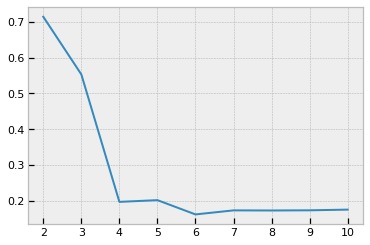

In [134]:
## Create the Silhouette Score Chart
sns.lineplot(x=clusters, y=list(silhouette_scores.values()))

[2 2 2 ... 2 1 2]


In [135]:
bics = []
aics = []
clusters = np.arange(2, N_CLUSTERS+1)

for n_cluster in clusters:
    gm = GaussianMixture(n_components=n_cluster )
    y_clust_gm = gm.fit_predict(X)
    bics.append(gm.bic(X))
    aics.append(gm.aic(X))

# df_abics = pd.DataFrame({ 'Clusters': cluster + clusters,
#                           'ABIC': bics + aics,
#                           'AIC': aics
# })

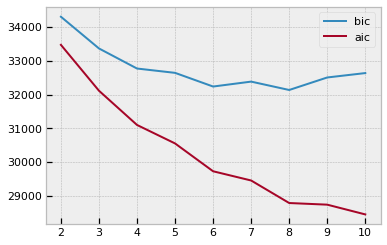

In [136]:
## Create AIC and BIC chart
plt.plot(clusters, bics, label='bic')
plt.plot(clusters, aics, label='aic')
plt.legend()
plt.show()

In [137]:
## Find the Bayesian Gaussian Mixture
bgm = BayesianGaussianMixture ( n_components = 10 , n_init = 10 )
bgm.fit ( X )
print(np.round ( bgm.weights_ , 2 ))



[0.06 0.27 0.03 0.02 0.01 0.22 0.08 0.03 0.09 0.2 ]


New dimensions = (1599, 6)
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

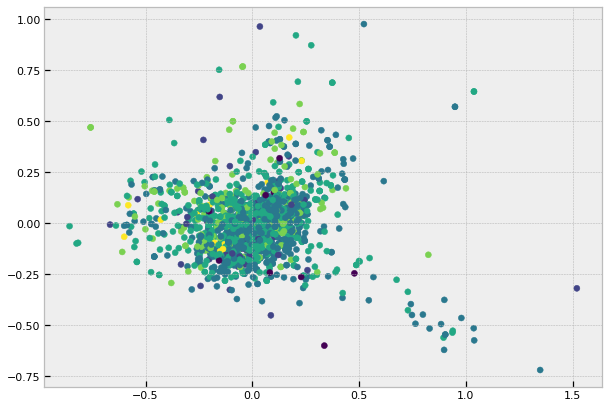

In [43]:
## PCA - Using 2 dimensions for visual analysis
# pca = PCA(n_components=2)
pca = KernelPCA(n_components=6, kernel='sigmoid', degree=2, gamma=0.04)
X2dim = pca.fit_transform(X)
print(f'New dimensions = {X2dim.shape}')

###
## Explained variance ratio shows the of the datas variance that
# lies along each principal component.
# print(f'principal Components = {pca.components_}')
# print(f'principal components = {pca.explained_variance_ratio_}')

# Plot 2-D PCA
print(y)
lg = np.arange(3, 9)

plt.figure(figsize=(10, 7))
sc_plot = plt.scatter(X2dim[:, 0], X2dim[:, 1], c=y)
xl = f'PCA dimension 1 {pca.explained_variance_ratio_[0]:.2f}% explained'
yl = f'PCA dimension 2 {pca.explained_variance_ratio_[1]:.2f}% explained'
plt.title('Phishing Scatterplot for PCA reduction to 2D')
plt.xlabel(xl) #f'PCA dimension 1 {pca.explained_variance_ratio_[0]:.2f}% explained')
plt.ylabel(yl) #'PCA dimension 2')
lbls = np.unique(y)
handles = [plt.Line2D([], [],
           marker='o',
           ls='',
           color=sc_plot.cmap(sc_plot.norm(yi))) for yi in lbls]
plt.legend(handles, lbls, title='Quality')
plt.show()

# print(xl)

New dimensions = (1599, 6)
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

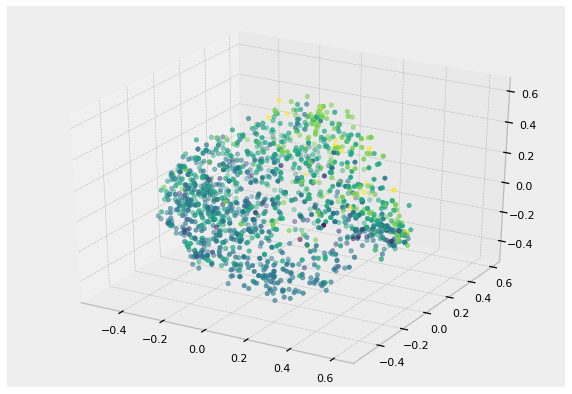

In [41]:
## PCA - Using 3 dimensions for visual analysis
# pca = PCA(n_components=3)
pca = KernelPCA(n_components=6, kernel='rbf', degree=4, gamma=0.1)
X3dim = pca.fit_transform(X)
print(f'New dimensions = {X3dim.shape}')

###
## Explained variance ratio shows the of the datas variance that
# lies along each principal component.
# print(f'principal Components = {pca.components_}')
# print(f'principal components = {pca.explained_variance_ratio_}')

# Plot 3-D PCA
print(y)
lg = np.arange(3, 9)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
sc_plot = ax.scatter(X3dim[:, 0], X3dim[:, 1], X3dim[:, 2], marker='o', c=y)
xl = f'PCA dimension 1 {pca.explained_variance_ratio_[0]:.2f}% explained'
yl = f'PCA dimension 2 {pca.explained_variance_ratio_[1]:.2f}% explained'
zl = f'PCA dimension 3 {pca.explained_variance_ratio_[2]:.2f}% explained'
plt.title('Phishing Scatterplot for PCA reduction to 3D')
plt.xlabel(xl) #f'PCA dimension 1 {pca.explained_variance_ratio_[0]:.2f}% explained')
plt.ylabel(yl) #'PCA dimension 2')
plt.ylabel(zl) #'PCA dimension 2')

lbls = np.unique(y)
handles = [plt.Line2D([], [],
           marker='o',
           ls='',
           color=sc_plot.cmap(sc_plot.norm(yi))) for yi in lbls]
plt.legend(handles, lbls, title='Quality')
plt.show()

In [45]:
## Calculate the best PCS dimensions
pca_res = KernelPCA(n_components=6, kernel='rbf', degree=4, gamma=0.1)
pca_res.fit(X)
d = np.argmax(np.cumsum(pca_res.explained_variance_ratio_) >=  0.95) + 1
print(f'optimal PCA dimensions = {d}')

AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

In [160]:
## Use the optimal dimension to calculate the principal components...

pca = KernelPCA(n_components=5)
X2dim = pca.fit_transform(X)
print(f'New dimensions = {X2dim.shape}')
print(f'principal components = {pca.explained_variance_ratio_}')

New dimensions = (1599, 5)
principal components = [0.39212869 0.27647684 0.10487209 0.06538513 0.06152596]


expl_variances = 
[0.3921286934786711, 0.6686055369612055, 0.7734776229080448, 0.8388627523846227, 0.9003887141570126, 0.9370199573948438, 0.95969440089986, 0.9788786244162191, 0.9918830931225185, 0.9973520997956462]
dimensions = 
[ 1  2  3  4  5  6  7  8  9 10]


/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


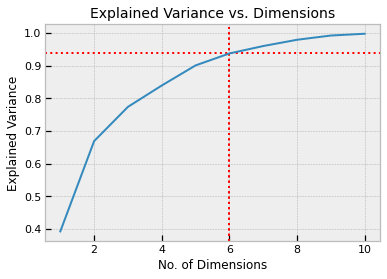

In [187]:
## Plot different dimensions against the explained variance
NO_DIMS_TO_CHECK = 11
dimensions = np.arange(1, NO_DIMS_TO_CHECK)
expl_variances = []

for dimension in dimensions:
    pca = PCA(n_components=dimension)
    pca.fit(X)
    expl_variances.append(np.sum(pca.explained_variance_ratio_))

print(f'expl_variances = \n{expl_variances}')
print(f'dimensions = \n{dimensions}')
plt.title('Explained Variance vs. Dimensions', fontsize=14)
plt.xlabel('No. of Dimensions', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.axvline(6, color='r', linestyle='dotted')
plt.axvline(6, color='r', linestyle='dotted')
plt.axhline(0.938, color='r', linestyle='dotted')
sns.lineplot(dimensions, expl_variances)